This notebook utilizes data taken by an ESP8266 microcontroller via an MS5803-05BA sensor during freezing experiments to explore the relationship between the freezing rate and initial gain in pressure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load all data
# 10-19-23
delimiters = r'[:,]'
water_data_10_19 = pd.read_csv('Pressure Data/-30_10-19-23/water_data.csv',sep=delimiters,header=None,engine='python')
length_10_19 = water_data_10_19.index.tolist()

# 10-23-23
delimiters = r'[:,]'
water_data_10_23 = pd.read_csv('Pressure Data/-30_10-23-23/water_data.csv',sep=delimiters,header=None,engine='python')
length_10_23 = water_data_10_23.index.tolist()

# 10-25-23
delimiters = r'[:,]'
water_data_10_25 = pd.read_csv('Pressure Data/-40_10-25-23/water_data.csv',sep=delimiters,header=None,engine='python')
length_10_25 = water_data_10_25.index.tolist()

# 10-26-23 Not plotting because ~40 min of fracture data was not taken due to errors
#delimiters = r'[:,]'
#water_data_10_26 = pd.read_csv('Pressure Data/-40_10-26-23_major_errors/water_data.csv',sep=delimiters,header=None,engine='python')
#length_10_26 = water_data_10_26.index.tolist()

# 11-6-23
delimiters = r'[:,]'
water_data_11_6 = pd.read_csv('Pressure Data/-30_11-6-23/water_data.csv',sep=delimiters,header=None,engine='python')
length_11_6 = water_data_11_6.index.tolist()

note that this sample was not water or air tight as evidenced by drips through the pressure sensor seal


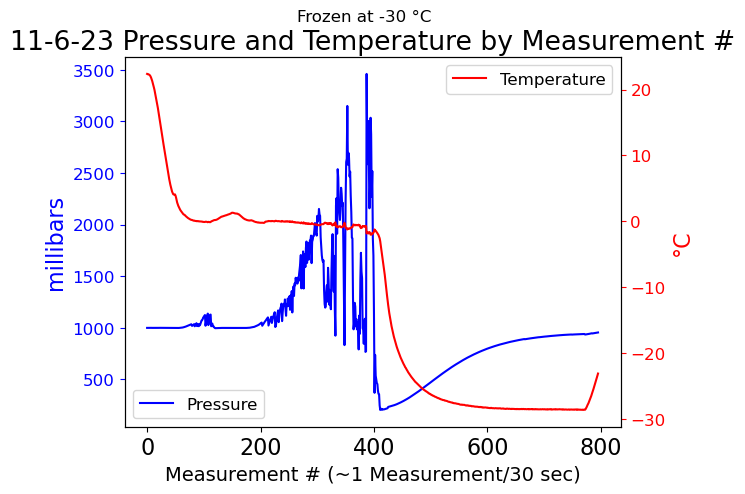

In [3]:
plt.rcParams.update({'font.size': 16})
fig, ax1 = plt.subplots()
ax1.plot(length_11_6, water_data_11_6[1], 'b', label='Pressure')
ax1.set_xlabel('Measurement # (~1 Measurement/30 sec)',fontsize=14)
ax1.set_ylabel('millibars', color='b')
ax1.tick_params('y', colors='b', labelsize=12)

ax2 = ax1.twinx()
ax2.plot(length_11_6, water_data_11_6[3], 'r', label='Temperature')
ax2.set_ylabel('°C', color='r')
ax2.tick_params('y', colors='r', labelsize=12)

ax1.legend(loc='lower left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
plt.title('11-6-23 Pressure and Temperature by Measurement #')
plt.suptitle('Frozen at -30 °C',fontsize=12)
plt.xlim()
print('note that this sample was not water or air tight as evidenced by drips through the pressure sensor seal')
#plt.savefig('Pressure Temperature FirstTrial.png', dpi=300, bbox_inches='tight')
plt.show()

From the figure above, let's isolate the intial drop in temperature and find the freezing rate at -30C

note that this sample was not water or air tight as evidenced by drips through the pressure sensor seal


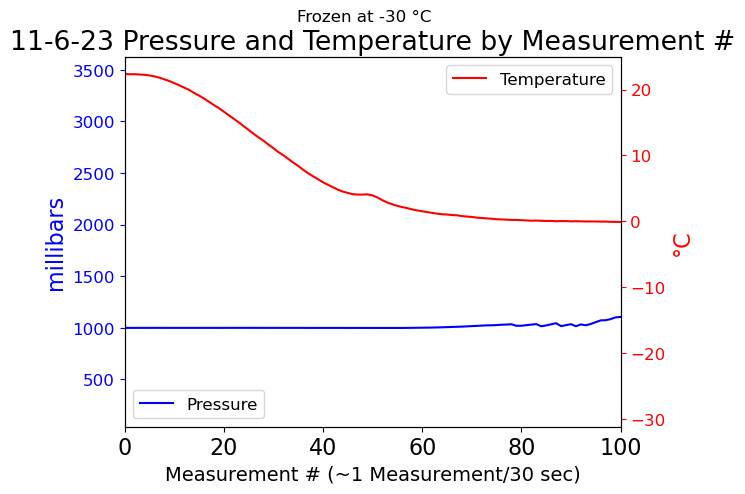

In [4]:
plt.rcParams.update({'font.size': 16})
fig, ax1 = plt.subplots()
ax1.plot(length_11_6, water_data_11_6[1], 'b', label='Pressure')
ax1.set_xlabel('Measurement # (~1 Measurement/30 sec)',fontsize=14)
ax1.set_ylabel('millibars', color='b')
ax1.tick_params('y', colors='b', labelsize=12)

ax2 = ax1.twinx()
ax2.plot(length_11_6, water_data_11_6[3], 'r', label='Temperature')
ax2.set_ylabel('°C', color='r')
ax2.tick_params('y', colors='r', labelsize=12)

ax1.legend(loc='lower left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
plt.title('11-6-23 Pressure and Temperature by Measurement #')
plt.suptitle('Frozen at -30 °C',fontsize=12)
plt.xlim(0,100)
print('note that this sample was not water or air tight as evidenced by drips through the pressure sensor seal')
#plt.savefig('Pressure Temperature FirstTrial.png', dpi=300, bbox_inches='tight')
plt.show()

So 10 to 60 measurements is about right <br>
Let's find the approx. linear freezing rate <br>


In [5]:
# finding dT/dt
temp_11_6 = water_data_11_6[3]
intial_temp_drop_11_6 = np.array(temp_11_6[10:60])
dt = np.array(length_11_6[10:60]) * 30
dT_length = np.linspace(10*30,60*30,100)

In [6]:
T_fit = np.poly1d(np.polyfit(dt,intial_temp_drop_11_6,1)) # linear fit
print('T = ' + str(T_fit) + ' where x is time')

T =  
-0.0142 x + 24.56 where x is time


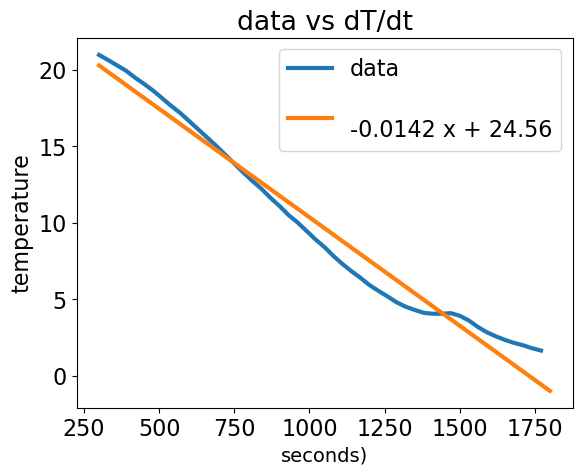

In [7]:
plt.plot(dt, intial_temp_drop_11_6, label = 'data',linewidth = 3)
plt.plot(dT_length,T_fit(dT_length), label = T_fit,linewidth = 3)
plt.xlabel('seconds)',fontsize=14)
plt.ylabel('temperature')
plt.title('data vs dT/dt')
plt.legend()

## $$
  Q_{est} = \rho_{water}  C_p  \frac{dT}{dt}
$$

From the linear fit T = -0.0142 x + 24.56, our rate of heating value is -0.0142 <br>
let's calculate Q_est now

In [8]:
rho_water = 1000 # set water density to 1000 kg / m^3
C_p = 4181 # set heat capacity of water to 4181 j / kg C
dT_dt = round(T_fit.coef[0],4) # set rate of heating to output of polyfit
dT_dt = dT_dt * -1 # turn rate of heating into rate of cooling
Q_est = rho_water * C_p * dT_dt
print(f'the estimated rate of freezing is {round(Q_est)}')

the estimated rate of freezing is 59370


now, let's calculate the ice mass formation rate <br>

## $$
  \dot{Mass_{ice}} = \frac{Q_{est}}{ l_f \rho_{ice}}
$$

In [9]:
l_f = 334000 # set specific latent heat of fusion per unit mass to 334,000 j / kg
rho_water = 1000  # set water density to 1000 kg / m^3
Mass_ice = Q_est / (l_f * rho_water)
print(f'the estimated growth of ice in mass per second is {(Mass_ice)}')

the estimated growth of ice in mass per second is 0.0001777550898203593


now that we have our ice mass growth rate, let's find the rate of change in volume of a unit sphere defined as having radius = 1 <br>
## $$
  \dot{Volume_{Sphere}} = \frac{1}{\rho_{ice}} \dot{Mass_{ice}}
$$

In [10]:
rho_ice = 917 # set ice density to 917 kg / m^3
Volume_ice = Mass_ice/ rho_ice
print(f'the estimated change in volume per second is {(Volume_ice)}')

the estimated change in volume per second is 1.9384415465688038e-07


Now, let's calculate the change in pressure <br>
## $$
  \dot{Pressure} = \frac{k_f}{v_0} \dot{Volume_{Sphere}}
$$

In [11]:
k_f = 1.96 * 10**9 # set bulk modulus of water to 1.96*10^9 pascals
v_0 = 4/3 * np.pi * 1**3 # set initial sphere volume (as liquid)
pressure_change = Volume_ice * k_f / v_0
print(f'the estimated change in pressure in pascals per second is {(pressure_change)}')
print(f'the estimated change in pressure in millibars per second is {(pressure_change / 100)}')

the estimated change in pressure in pascals per second is 90.70269088515033
the estimated change in pressure in millibars per second is 0.9070269088515033


This is a little more than twice a rough estimate of the initial experimental change in pressure shown below, they are of the same order of magnitude

In [12]:
#rough calculation:
time_change = (300-200) * 30
pressure_change = 2200 - 1000
dp_dt = pressure_change / time_change
print(dp_dt)

0.4


note that this sample was not water or air tight as evidenced by drips through the pressure sensor seal


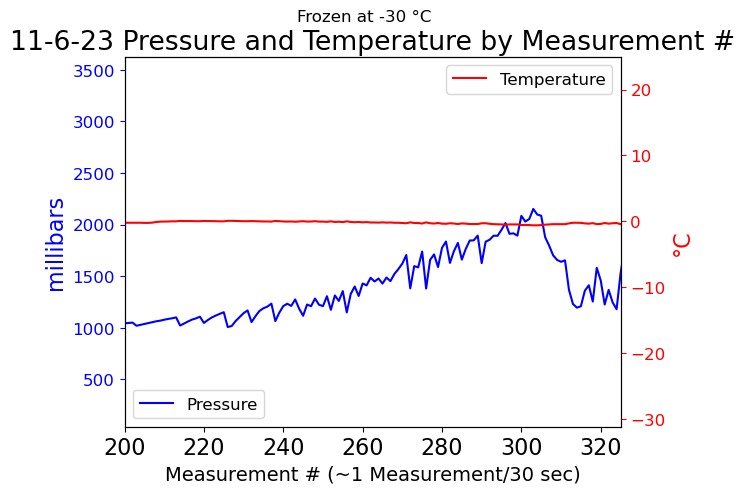

In [13]:
plt.rcParams.update({'font.size': 16})
fig, ax1 = plt.subplots()
ax1.plot(length_11_6, water_data_11_6[1], 'b', label='Pressure')
ax1.set_xlabel('Measurement # (~1 Measurement/30 sec)',fontsize=14)
ax1.set_ylabel('millibars', color='b')
ax1.tick_params('y', colors='b', labelsize=12)

ax2 = ax1.twinx()
ax2.plot(length_11_6, water_data_11_6[3], 'r', label='Temperature')
ax2.set_ylabel('°C', color='r')
ax2.tick_params('y', colors='r', labelsize=12)

ax1.legend(loc='lower left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
plt.title('11-6-23 Pressure and Temperature by Measurement #')
plt.suptitle('Frozen at -30 °C',fontsize=12)
plt.xlim(200,325)
print('note that this sample was not water or air tight as evidenced by drips through the pressure sensor seal')
#plt.savefig('Pressure Temperature FirstTrial.png', dpi=300, bbox_inches='tight')
plt.show()